In [1]:
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
image_path = './Images/IR_00002.JPG'
image = Image.open(image_path).convert('L') 
image_array = np.array(image)

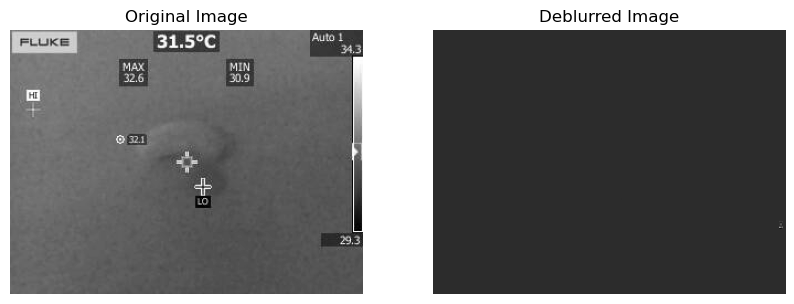

In [3]:

deblurred_image_array = wiener(image_array, (5, 5))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_array, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(deblurred_image_array, cmap='gray')
ax[1].set_title('Deblurred Image')
ax[1].axis('off')

plt.show()

In [5]:
import numpy as np
from scipy.signal import convolve2d
import cv2
def motion_blur_psf(length=15, angle=0):
    

    psf = np.zeros((length, length))
    psf[int(length / 2), :] = 1
    

    rotation_matrix = cv2.getRotationMatrix2D((length / 2, length / 2), angle, 1)
    psf = cv2.warpAffine(psf, rotation_matrix, (length, length))
    
    # Normalize the PSF
    psf /= psf.sum()
    
    return psf

# Example usage:
psf = motion_blur_psf(length=21, angle=45)
print(psf)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00459594 0.02274033
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.    

The Point Spread Function (PSF) describes how a system blurs a single point of light or any small object. In the context of imaging systems, like cameras or telescopes, the PSF is the response of the system to a point source or point object. Essentially, it tells you how the system "spreads" light from a single point.

In motion_blur_psf:
    Create a synthetic motion blur PSF with a given length and angle.

    Parameters:
    length (int): the number of pixels by which the motion extends.
    angle (float): the angle of the motion in degrees.

    Returns:
    ndarray: A 2D array with the synthetic motion blur PSF.